In [2]:
#Reto: Explorando el índice de felicidad
#Diego Portillo

#Subir Happiness_reporte.csv y Metadata.csv
from google.colab import files
uploaded = files.upload()

Saving Metadata.csv to Metadata.csv
Saving Happiness_report.csv to Happiness_report.csv


In [25]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carga los datos de Happiness_reporte.csv en DataFrame happiness
happiness = pd.read_csv("Happiness_report.csv")

# Filtra la información de México
mexico = happiness[happiness['Country or region'] == 'Mexico']

# Establece la columna 'Country or region' como índice en el DataFrame mexico
mexico.set_index('Country or region', inplace=True)


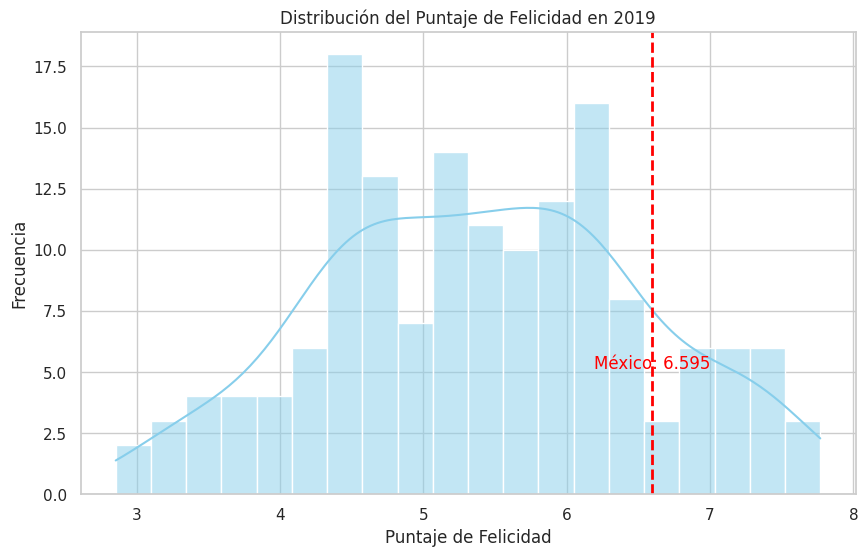

In [26]:

# Estilo para el gráfico
sns.set(style="whitegrid")

# Obtiene el puntaje de felicidad de México
score_mexico = mexico['Score'].values[0]

# Crea el histograma de los puntajes de felicidad
plt.figure(figsize=(10, 6))
sns.histplot(happiness['Score'], bins=20, kde=True, color='skyblue')

# Agregar una línea y etiqueta para el puntaje de México
plt.axvline(score_mexico, color='red', linestyle='--', linewidth=2)
plt.text(score_mexico, 5, f'México: {score_mexico}', color='red', ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title("Distribución del Puntaje de Felicidad en 2019")
plt.xlabel("Puntaje de Felicidad")
plt.ylabel("Frecuencia")

# Muestra el gráfico
plt.show()

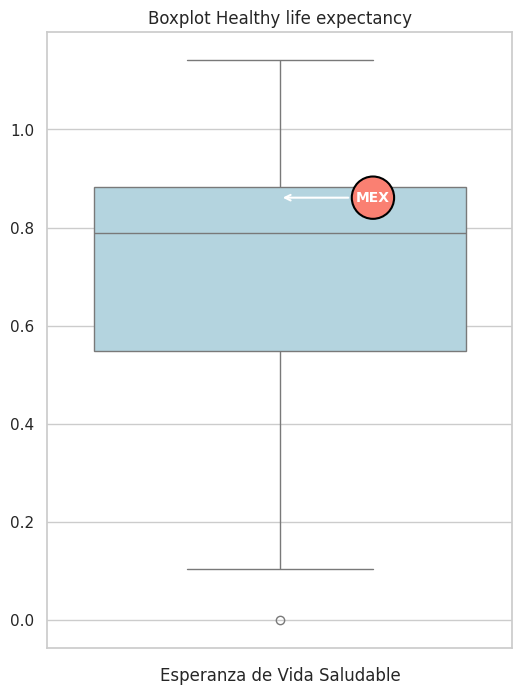

In [27]:

# Estilo de gráfico
sns.set(style="whitegrid")

# Obtiene el valor de esperanza de vida saludable para México
life_expectancy_mexico = mexico['Healthy life expectancy'].values[0]

# Crea el boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(y=happiness['Healthy life expectancy'], color='lightblue')

# Hace la anotación para el valor de México
plt.annotate(
    'MEX',  # Texto dentro del círculo
    xy=(0, life_expectancy_mexico),  # Coordenadas del punto de México
    xytext=(0.2, life_expectancy_mexico),  # Posición del texto
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  # Flecha
    bbox=dict(boxstyle="circle,pad=0.3", fc="salmon", ec="black", lw=1.5),  # Círculo de fondo
    color='white',  # Color del texto
    ha='center', va='center', fontsize=10, fontweight='bold')

# Personaliza el gráfico
plt.title("Boxplot Healthy life expectancy")
plt.ylabel("")
plt.xlabel("Esperanza de Vida Saludable")

# Muestra el gráfico
plt.show()

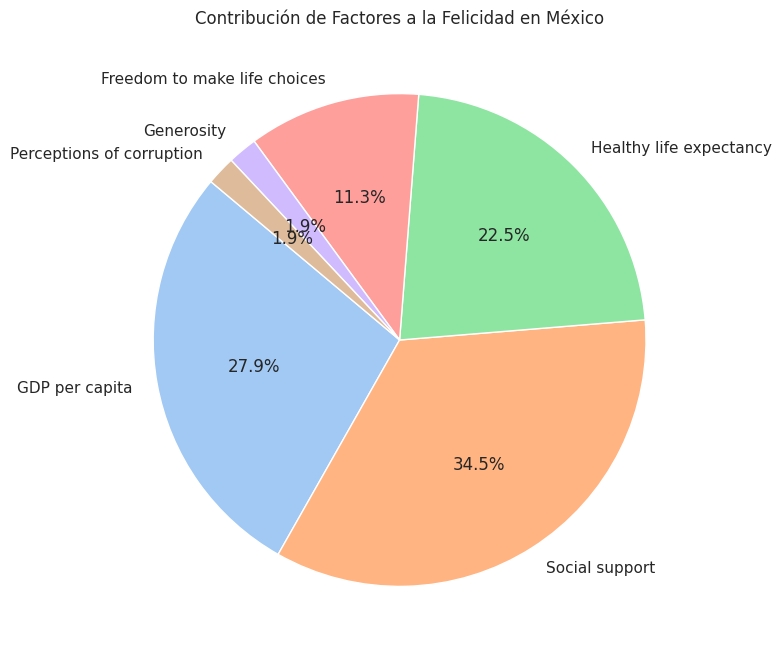

In [28]:
# Selecciona los valores de los factores para México
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
values = mexico[factors].values[0]  # Obtener los valores como una lista

# Crea la gráfica de pastel
plt.figure(figsize=(8, 8))
plt.pie(values, labels=factors, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

# Personaliza el gráfico
plt.title("Contribución de Factores a la Felicidad en México")
plt.show()

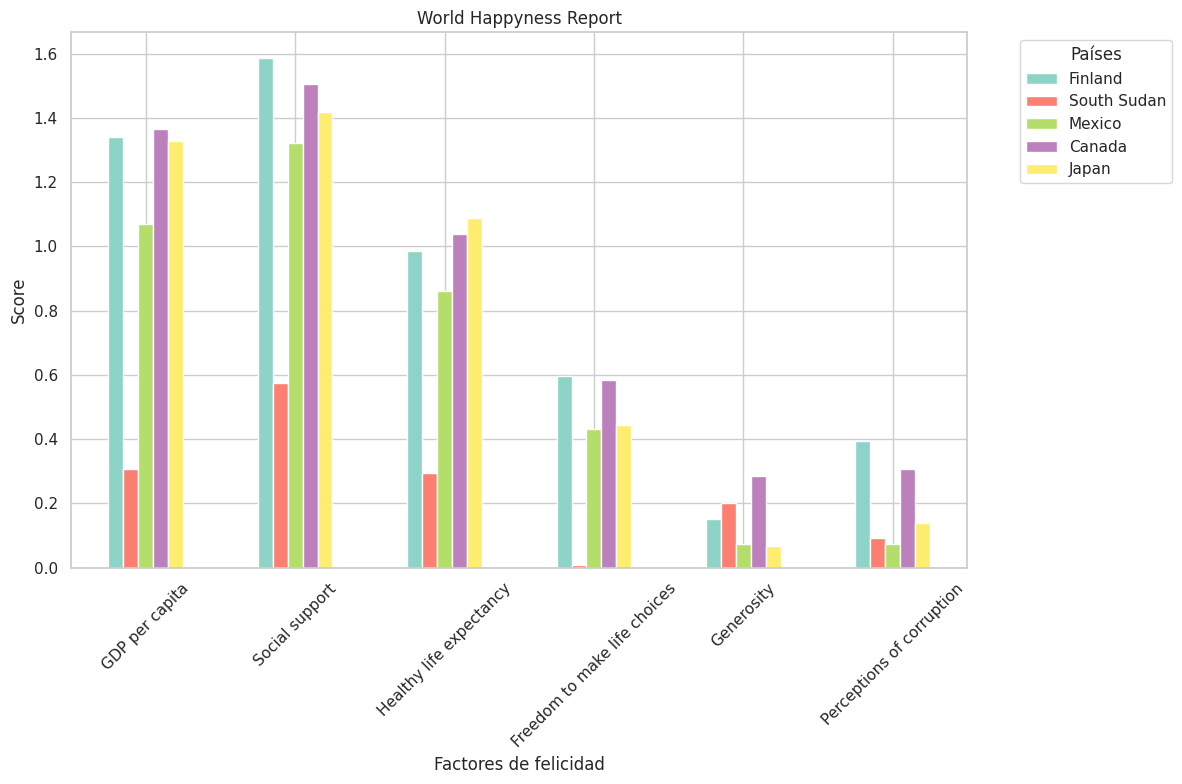

In [29]:

# Selecciona los factores
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Filtra los países
most_happy = happiness.nlargest(1, 'Score')  #  más feliz
least_happy = happiness.nsmallest(1, 'Score')  #  menos feliz
mexico = happiness[happiness['Country or region'] == 'Mexico']  # México
additional_countries = happiness[happiness['Country or region'].isin(['Japan', 'Canada'])]  # Otros países de interés

# Concatena los datos de los 5 países en un solo DataFrame
selected_countries = pd.concat([most_happy, least_happy, mexico, additional_countries])

# Establece el índice en 'Country or region' para usarlo como etiquetas en el gráfico
selected_countries.set_index('Country or region', inplace=True)

# Crea la gráfica de barras agrupadas
selected_countries[factors].T.plot(kind='bar', figsize=(12, 8), colormap='Set3')

# Personaliza el gráfico
plt.title("World Happyness Report")
plt.ylabel("Score")
plt.xlabel("Factores de felicidad")
plt.xticks(rotation=45)
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')

# Muestra el gráfico
plt.tight_layout()
plt.show()

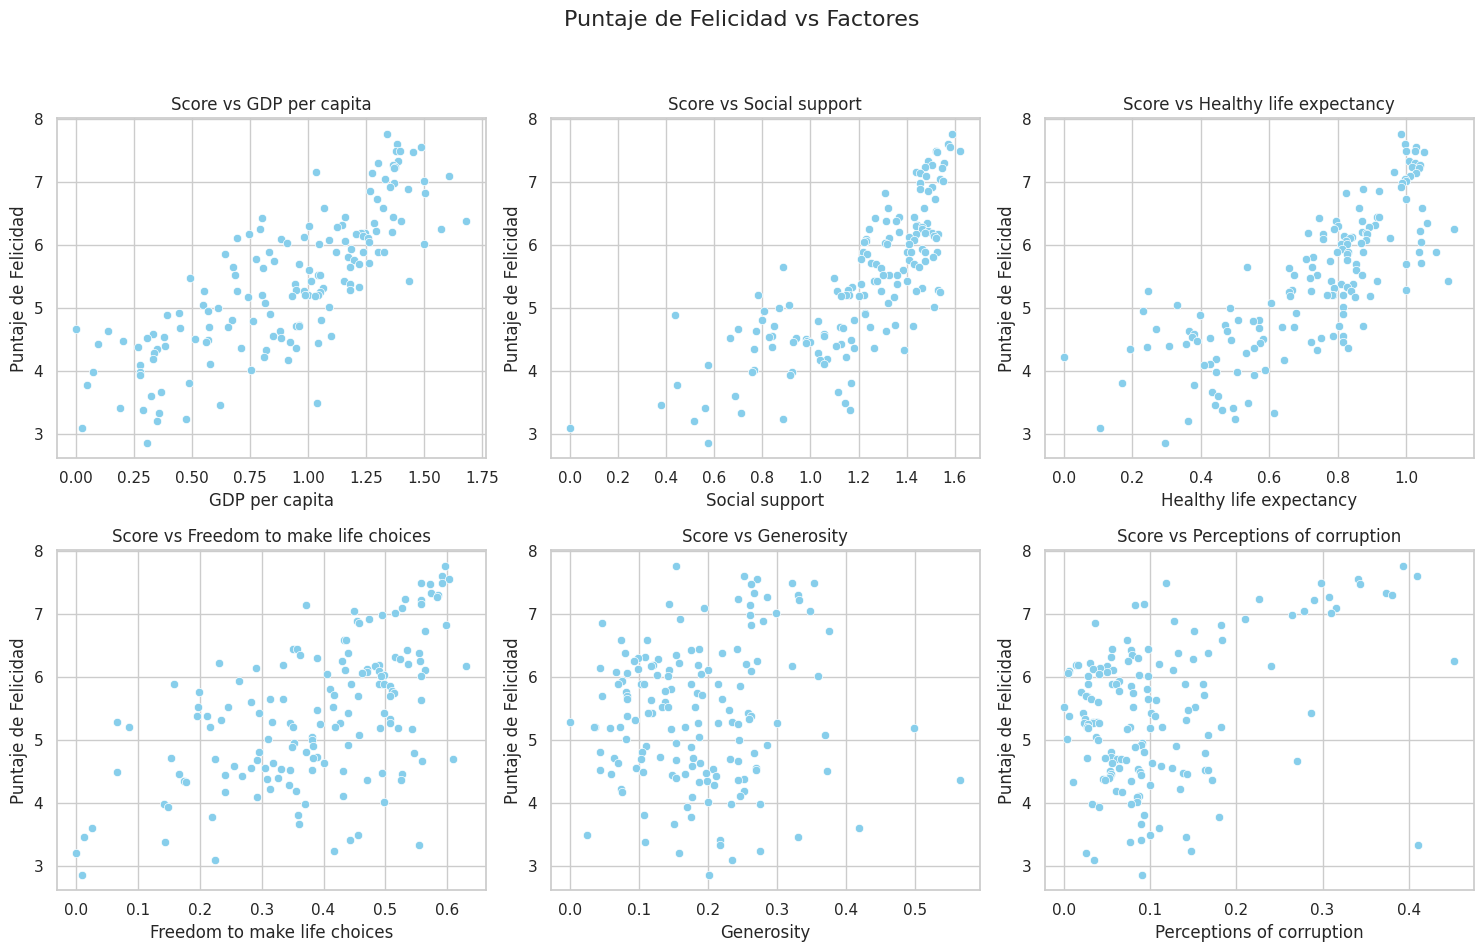

In [30]:

# Lista de factores y nombre del puntaje
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
score_column = 'Score'

# Crea la figura y los ejes para la matriz
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Puntaje de Felicidad vs Factores", fontsize=16)

# Genera un scatter plot para cada factor
for i, factor in enumerate(factors):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=happiness, x=factor, y=score_column, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f"Score vs {factor}")
    axes[row, col].set_xlabel(factor)
    axes[row, col].set_ylabel("Puntaje de Felicidad")

# Ajusta el espacio entre subgráficas
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Muestra el gráfico
plt.show()

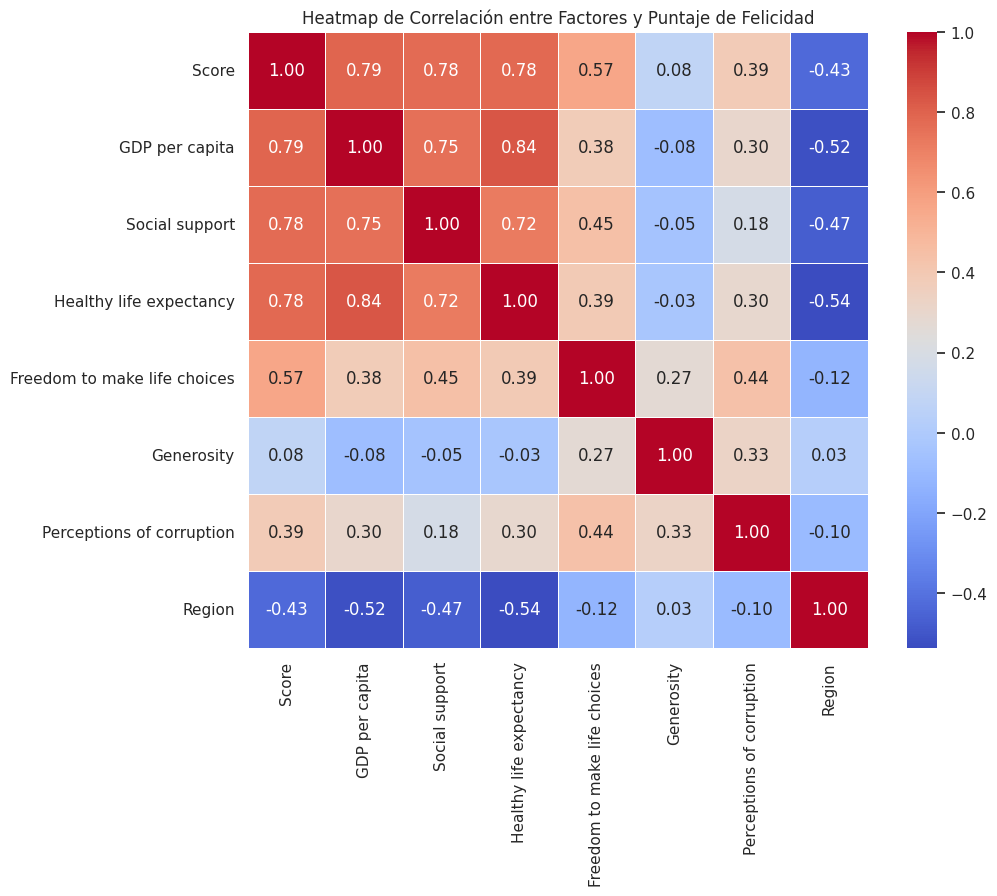

In [31]:
# Combina los DataFrames happiness y metadata
df_combined = pd.merge(happiness, metadata, left_on="Country or region", right_on="TableName", how="left")

# Selecciona las columnas numéricas y codifica la región en valores numéricos
df_combined['Region'] = df_combined['Region'].astype('category').cat.codes

# Selecciona columnas para el cálculo de correlación
columns_of_interest = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Region']
df_correlation = df_combined[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = df_correlation.corr()

# Crea el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Personaliza el heatmap
plt.title("Heatmap de Correlación entre Factores y Puntaje de Felicidad")

# Muestra el gráfico
plt.show()